In [20]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [3]:
# Store filepath in a variable
census_data = "chicago_census_data.csv"
vaccine_data = "COVID-19_Vaccinations_by_ZIP_Code.csv"

In [4]:
census_df = pd.read_csv(census_data, encoding="ISO-8859-1")
vaccine_df = pd.read_csv(vaccine_data,encoding="ISO-8859-1")

In [5]:
#cleaning census so Zip Code column matches Vaccinee CSV Zip Code
census_df = census_df.rename(columns={"Zipcode":"Zip Code"})
census_df.dtypes

Zip Code               int64
Population             int64
Median Age           float64
Household Income       int64
Per Capita Income      int64
Poverty Count          int64
Poverty Rate         float64
dtype: object

In [6]:
#getting rid of 'Unknown' values in vaccine df
vaccine_df = vaccine_df[vaccine_df["Zip Code"] != "Unknown"]
#changing Zip Code from Object to int
vaccine_df["Zip Code"]=vaccine_df["Zip Code"].astype(int)

In [7]:
#merging Data
merge_df = pd.merge(vaccine_df, census_df, on="Zip Code")
merge_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,Population_x,ZIP Code Location,Row_ID,Population_y,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,60603,12/15/2020,0,0,0,0,0.000,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201215,1052,31.2,146250,134620,142,13.498099
1,60603,12/16/2020,0,0,0,0,0.000,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201216,1052,31.2,146250,134620,142,13.498099
2,60603,12/17/2020,8,8,8,8,0.008,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201217,1052,31.2,146250,134620,142,13.498099
3,60603,12/18/2020,6,14,6,14,0.013,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201218,1052,31.2,146250,134620,142,13.498099
4,60603,12/19/2020,3,17,3,17,0.016,0,0,0.000,1052,POINT (-87.625473 41.880112),60603-20201219,1052,31.2,146250,134620,142,13.498099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,60656,02/09/2021,163,2789,130,2230,0.079,33,559,0.020,28218,POINT (-87.817934 41.974566),60656-20210209,28218,40.1,64440,36778,2129,7.544830
5854,60656,02/14/2021,42,3463,37,2768,0.098,5,695,0.025,28218,POINT (-87.817934 41.974566),60656-20210214,28218,40.1,64440,36778,2129,7.544830
5855,60656,12/27/2020,0,197,0,197,0.007,0,0,0.000,28218,POINT (-87.817934 41.974566),60656-20201227,28218,40.1,64440,36778,2129,7.544830
5856,60656,12/26/2020,3,197,3,197,0.007,0,0,0.000,28218,POINT (-87.817934 41.974566),60656-20201226,28218,40.1,64440,36778,2129,7.544830


In [8]:
test_df = merge_df.loc[merge_df["Population_x"] != merge_df["Population_y"]]
test_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,Vaccine Series Completed - Daily,Vaccine Series Completed - Cumulative,Vaccine Series Completed - Percent Population,Population_x,ZIP Code Location,Row_ID,Population_y,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate


In [12]:
final_df = merge_df.drop(columns=['Row_ID', 'Poverty Count', 'Poverty Rate', 'Household Income', 'Population_x', 'Vaccine Series Completed - Daily','Vaccine Series Completed - Cumulative','Vaccine Series Completed  - Percent Population'])
final_df.columns.tolist()

['Zip Code',
 'Date',
 'Total Doses - Daily',
 'Total Doses - Cumulative',
 '1st Dose - Daily',
 '1st Dose - Cumulative',
 '1st Dose - Percent Population',
 'ZIP Code Location',
 'Population_y',
 'Median Age',
 'Per Capita Income']

In [19]:
final_df

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income
0,60603,12/15/2020,0,0,0,0,0.000,POINT (-87.625473 41.880112),1052,31.2,134620
1,60603,12/16/2020,0,0,0,0,0.000,POINT (-87.625473 41.880112),1052,31.2,134620
2,60603,12/17/2020,8,8,8,8,0.008,POINT (-87.625473 41.880112),1052,31.2,134620
3,60603,12/18/2020,6,14,6,14,0.013,POINT (-87.625473 41.880112),1052,31.2,134620
4,60603,12/19/2020,3,17,3,17,0.016,POINT (-87.625473 41.880112),1052,31.2,134620
...,...,...,...,...,...,...,...,...,...,...,...
5853,60656,02/09/2021,163,2789,130,2230,0.079,POINT (-87.817934 41.974566),28218,40.1,36778
5854,60656,02/14/2021,42,3463,37,2768,0.098,POINT (-87.817934 41.974566),28218,40.1,36778
5855,60656,12/27/2020,0,197,0,197,0.007,POINT (-87.817934 41.974566),28218,40.1,36778
5856,60656,12/26/2020,3,197,3,197,0.007,POINT (-87.817934 41.974566),28218,40.1,36778


In [ ]:
#create line graphs that compare % complete on last day for each zip code
#to % complete for Chicago using final df (create a new df with final day)
#save as a png lowest average and highest average for presentation
#(See Matplot Lib Day 2 Activity 7)- Eugene
# if time, line graph 

In [ ]:
#create heat map of % complete - Sarah 
#save heatmap for presentation

In [ ]:
#median age comparison across zip codes - bar graph - John
#median age comparison to % complete/zip code- if time
#save png for presentation

In [18]:
#create a scatterplot comparing average income per capita and % vaccination- Amy
#calculate the r-value

max_dose = final_df.loc[final_df.groupby(["Zip Code"])["1st Dose - Cumulative"].idxmax()] 
max_dose

,Zip Code,Date,Total Doses - Daily,Total Doses - Cumulative,1st Dose - Daily,1st Dose - Cumulative,1st Dose - Percent Population,ZIP Code Location,Population_y,Median Age,Per Capita Income
3555,60601,03/25/2021,77,6280,55,4024,0.267,POINT (-87.622844 41.886262),15083,33.6,101066
3638,60602,03/25/2021,11,944,7,586,0.512,POINT (-87.628309 41.883136),1145,34.1,128502
99,60603,03/25/2021,8,995,8,623,0.592,POINT (-87.625473 41.880112),1052,31.2,134620
200,60604,03/25/2021,4,690,3,432,0.525,POINT (-87.629029 41.878153),823,32.2,101652
3790,60605,03/25/2021,179,14852,138,9349,0.322,POINT (-87.623449 41.867824),29060,33.6,81496
3857,60606,03/25/2021,41,1706,36,1114,0.339,POINT (-87.63676 41.882634),3287,36.3,136766
3959,60607,03/25/2021,217,14793,177,9486,0.324,POINT (-87.652727 41.876104),29293,30.2,61178
282,60608,03/25/2021,903,36794,802,27423,0.343,POINT (-87.670366 41.849879),80059,32.6,23525
388,60609,03/25/2021,435,18248,340,13052,0.214,POINT (-87.653382 41.812017),60939,32.3,19096
454,60610,03/25/2021,277,18763,229,12251,0.302,POINT (-87.63581 41.90455),40548,33.4,88537


In [13]:
income = max_dose["Per Capita Income"]
dose = max_dose["1st Dose - Percent Population"]
correlation = sts.pearsonr(income,dose)
print(f"The correlation between both per capita income and 1st Dose Percent Population is {round(correlation[0],2)}")

The correlation between both per capita income and 1st Dose Percent Population is 0.77


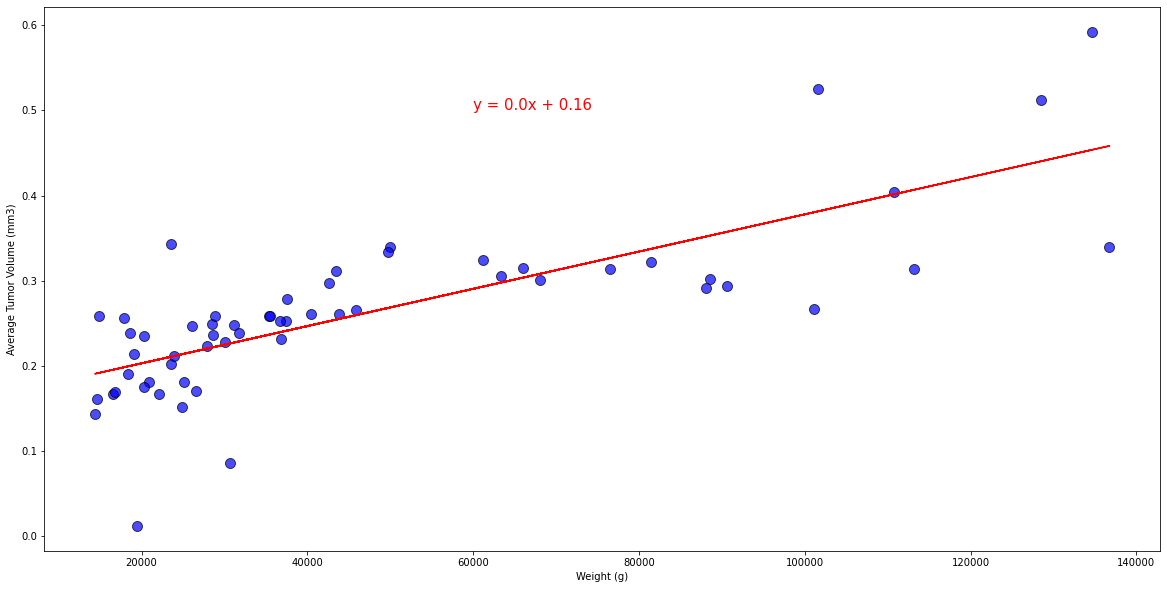

The r-value is: 0.7675260542636416


In [14]:
x_values = max_dose["Per Capita Income"]
y_values = max_dose["1st Dose - Percent Population"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure (figsize=(20,10))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            s=100, alpha=0.7)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60000,0.5),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show();
print(f"The r-value is: {rvalue}")